In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

# 1.Import dataset

In [4]:
dataset = pd.read_csv('uniqlo_stock_trainset.csv')
dataset.head(3)

,Date,Open,High,Low,Close,Volume,Stock Trading
0,12/30/2016,42120,42330,41700,41830,610000,2.562803e+10
1,12/29/2016,43000,43220,42540,42660,448400,1.918823e+10
2,12/28/2016,43940,43970,43270,43270,339900,1.478067e+10


In [5]:
description = dataset.describe()
description

,Open,High,Low,Close,Volume,Stock Trading
count,1226.000000,1226.000000,1226.000000,1226.000000,1.226000e+03,1.226000e+03
mean,33754.416803,34178.784666,33347.903752,33760.583197,7.275556e+05,2.440933e+10
std,10813.440409,10936.326802,10695.664102,10815.661389,4.137178e+05,1.526300e+10
min,13720.000000,13840.000000,13600.000000,13720.000000,1.391000e+05,3.966140e+09
25%,27788.750000,28091.250000,27401.250000,27675.000000,4.873000e+05,1.454097e+10
50%,34445.000000,34835.000000,33925.000000,34412.500000,6.260000e+05,2.153772e+10
75%,41412.500000,41900.000000,40810.000000,41365.000000,8.267000e+05,3.015922e+10
max,61550.000000,61970.000000,60740.000000,61930.000000,4.937300e+06,1.460450e+11


change Date column to right format

In [6]:
import datetime

In [7]:
# input_format = '%m/%d/%Y' # input format
# date_format = '%d/%m/%Y'
# dataset.Date = [datetime.datetime.strptime(d, input_format).strftime(date_format) for d in dataset.Date]
dataset.Date = pd.to_datetime( dataset.Date )

sort the dataset increasing by date -> the lastest value will locate at the end

In [8]:
dataset = dataset.sort_values(by='Date').reset_index(drop=True)

In [9]:
dataset.head(5)

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2012-01-04,14050,14050,13700,13720,559100,7.719804e+09
1,2012-01-05,13720,13840,13600,13800,511500,7.030811e+09
2,2012-01-06,13990,14030,13790,13850,765500,1.063561e+10
3,2012-01-10,13890,14390,13860,14390,952300,1.353341e+10
4,2012-01-11,14360,14750,14280,14590,1043400,1.519199e+10


In [10]:
max_open = description.Open[-1]
dataset.dtypes

Date             datetime64[ns]
Open                      int64
High                      int64
Low                       int64
Close                     int64
Volume                    int64
Stock Trading           float64
dtype: object

In [11]:
import matplotlib.dates as mdates

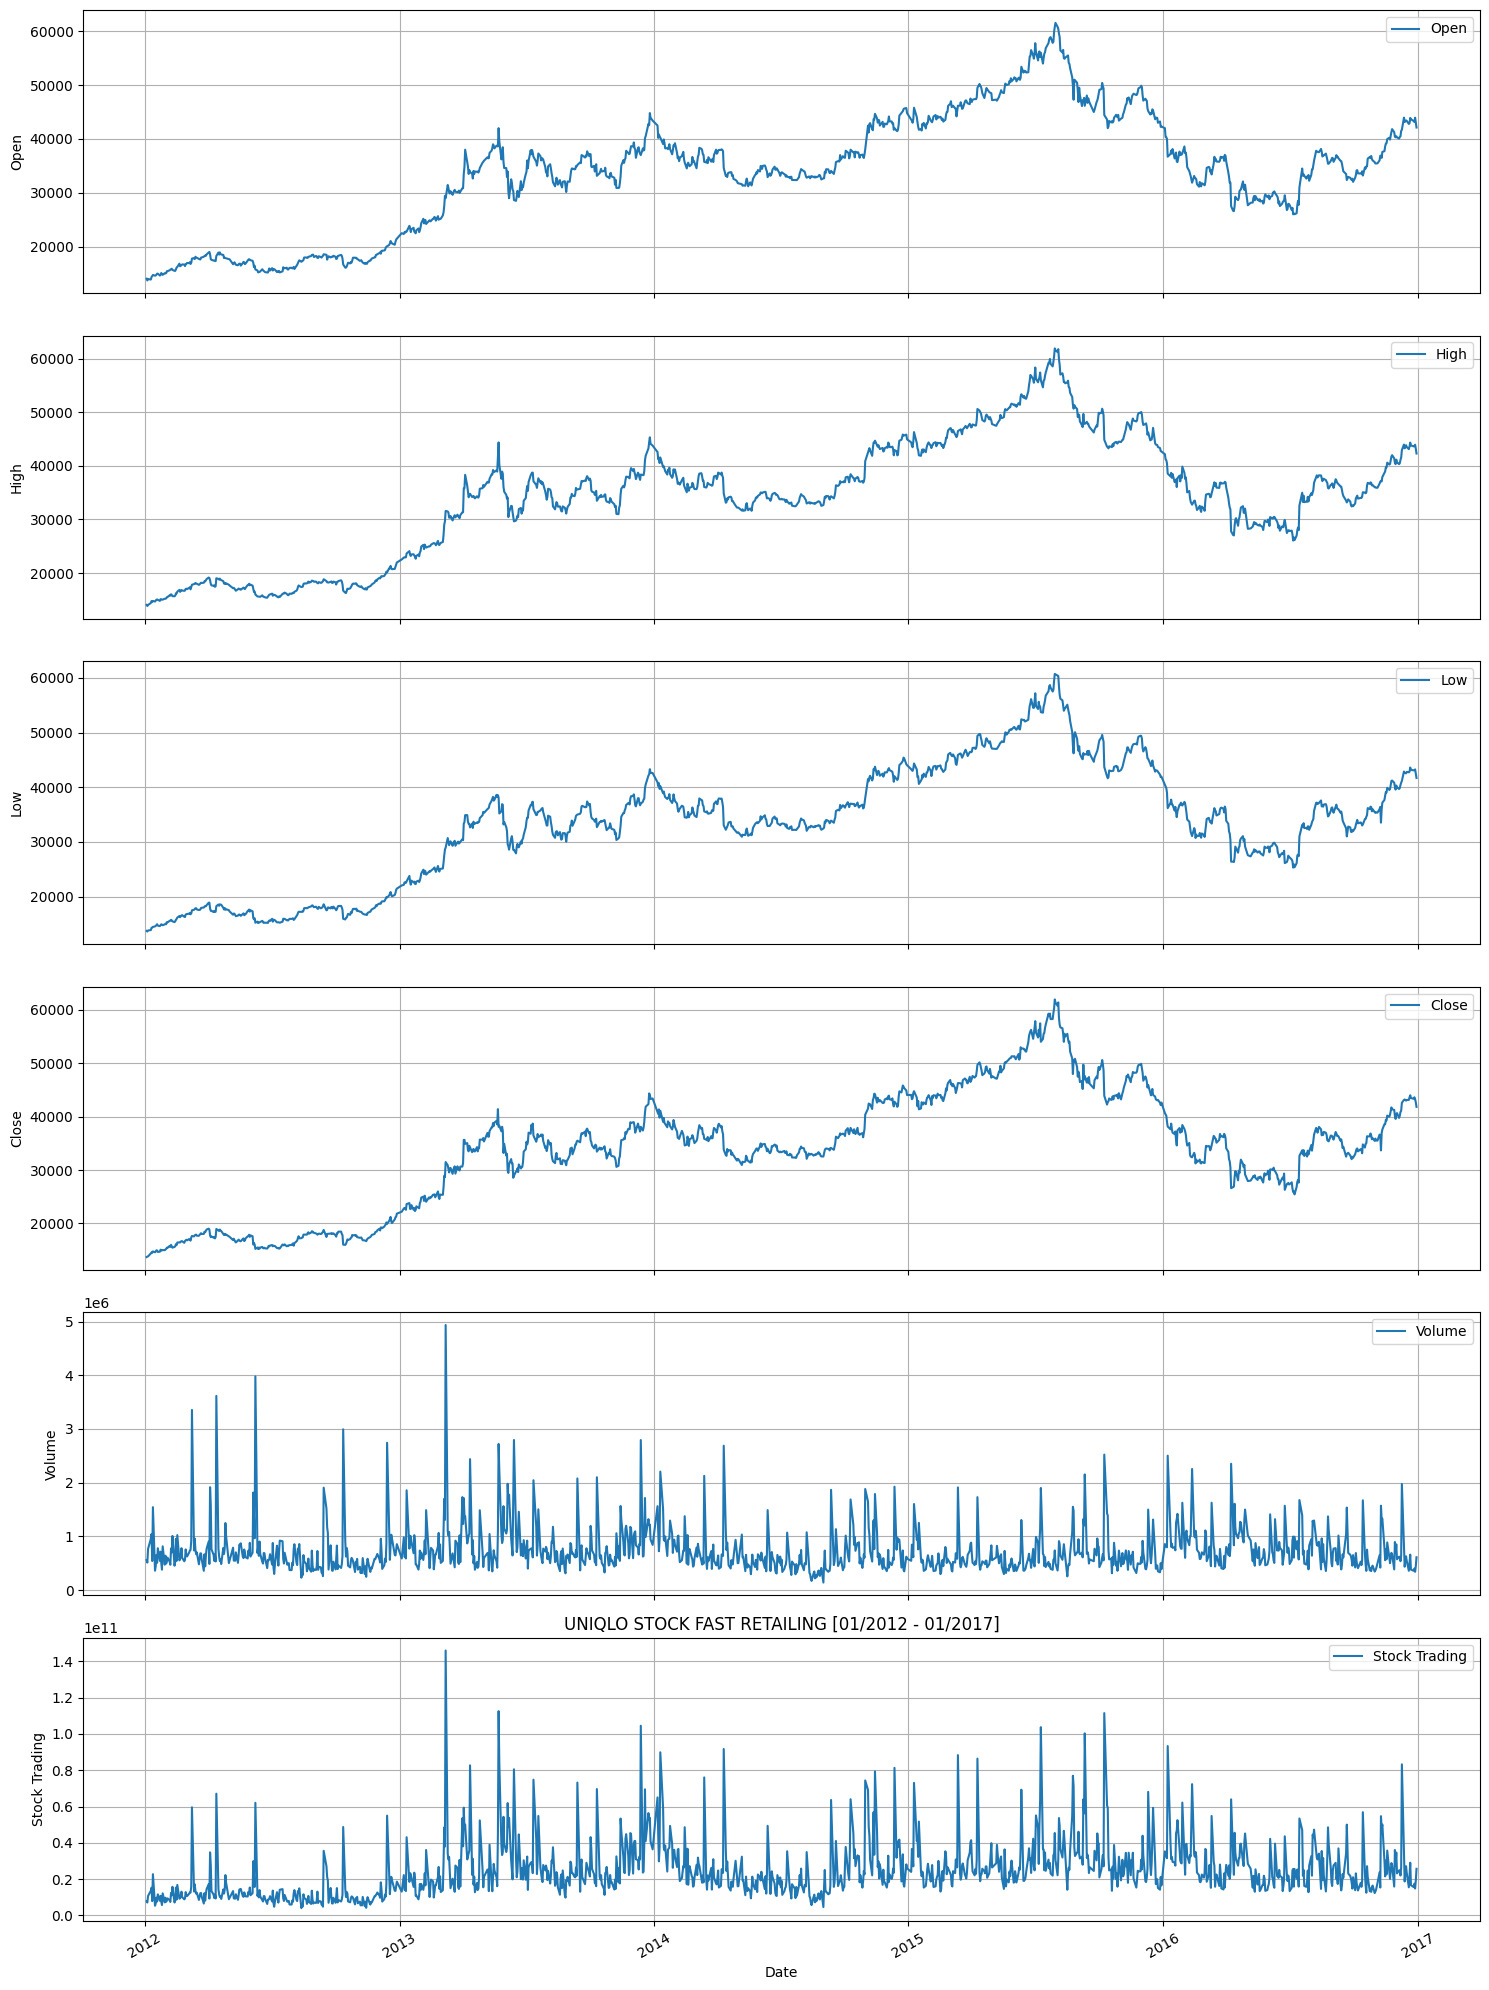

In [12]:
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(15, 20), sharex=True)

features = ['Open', 'High', 'Low', 'Close', 'Volume','Stock Trading']  # List of features to plot

for i, feature in enumerate(features):
    axs[i].plot(dataset['Date'], dataset[feature], label=feature)
    axs[i].set_ylabel(feature)
    axs[i].grid(True)
    axs[i].legend()

# Set x-axis ticks and rotation for better readability
plt.xticks(rotation=30)
plt.xlabel('Date')
plt.title("UNIQLO STOCK FAST RETAILING [01/2012 - 01/2017]")
plt.tight_layout()
plt.show()


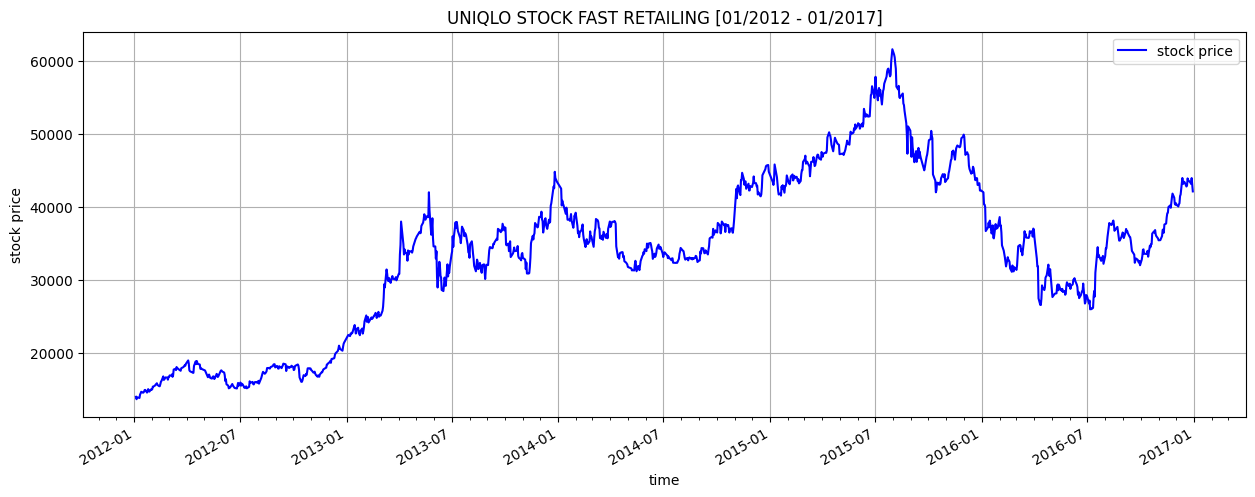

In [13]:
fig, ax = plt.subplots(figsize=[15,5])
# training accuracy
ax.set_title("UNIQLO STOCK FAST RETAILING [01/2012 - 01/2017]")
ax.plot(dataset.Date, dataset.Open, c='blue',label = "stock price")
ax.set_xlabel('time')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

ax.set_ylabel('stock price')
ax.grid(True)
ax.legend()

# 2.Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(dataset.iloc[:,1:].values)  # do not include Date column

In [15]:
data_shape = data_scaled.shape
print(data_scaled[:5])
print("shape", data_shape)

[[0.00689944 0.00436318 0.00212134 0.         0.08753282 0.02641958]
 [0.         0.         0.         0.00165941 0.07761244 0.02157021]
 [0.00564499 0.00394764 0.00403055 0.00269654 0.13054896 0.04694202]
 [0.00355425 0.01142738 0.00551549 0.01389753 0.16948022 0.06733777]
 [0.01338072 0.01890713 0.01442512 0.01804605 0.18846651 0.07901139]]
shape (1226, 6)


# 3.Train test split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = []
y = []
dates = []
n_step = 100  # predict
selected_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Stock Trading']

for i in range(n_step, data_shape[0]):
    X.append(data_scaled[i - n_step:i, :len(selected_features)])  # Selecting multiple features
    y.append(data_scaled[i, 0])  # Considering 'Open' as the predicted value
    dates.append(dataset.Date[i])

X, y = np.array(X), np.array(y)

print(X.shape)
print(y.shape)


(1126, 100, 6)
(1126,)


In [18]:
split_rate = 0.9  # first 90% of time interval is used for training
split_size = (int)(X.shape[0] * split_rate)
X_train,  X_test = X[:split_size,:], X[split_size:,:]
y_train, y_test = y[:split_size], y[split_size:]
train_date, test_date = dates[:split_size], dates[split_size:]
print("train shape", X_train.shape)
print("test shape", X_test.shape)

train shape (1013, 100, 6)
test shape (113, 100, 6)


In [19]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 6))
print(X_train.shape)

(1013, 100, 6)


In [20]:
# input: the scaled value (predictions of model), an original max value of the scaled value
# output: origin state of the scaled value
def restore_ground_val(scaled_p, origin_max):
    return np.array([p*origin_max for p in scaled_p])

# 4.RNN


In [21]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, BatchNormalization

## 4.1. Modeling

In [22]:
no_unit = 100
# Modeling
start = datetime.datetime.now()
RNN = Sequential(layers=
    [
        SimpleRNN(units=no_unit, return_sequences=True, input_shape = (X_train.shape[1], 6)),
        SimpleRNN(units=no_unit, return_sequences=True),
        SimpleRNN(units=no_unit, return_sequences=False),
        Dense(units = 1)
    ]
)

In [23]:
# Compiling
RNN.compile(optimizer='adam', loss = 'mse', metrics=["mae"])

In [24]:
RNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100, 100)          10700     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100, 100)          20100     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 100)               20100     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 51001 (199.22 KB)
Trainable params: 51001 (199.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Fitting train data
no_epoch = 10
batch_size = 32
validation_split = 0.2

history_rnn = RNN.fit(X_train, y_train, validation_split=validation_split,
                      epochs = no_epoch, batch_size = batch_size, verbose=1)
end = datetime.datetime.now()
RNN_training_time =  end-start
print("Total execution time: ", RNN_training_time)

Epoch 1/10
26/26 [==============================] - 12s 263ms/step - loss: 0.1814 - mae: 0.2412 - val_loss: 0.0078 - val_mae: 0.0740
Epoch 2/10
26/26 [==============================] - 8s 294ms/step - loss: 0.0032 - mae: 0.0444 - val_loss: 0.0018 - val_mae: 0.0324
Epoch 3/10
26/26 [==============================] - 6s 229ms/step - loss: 0.0012 - mae: 0.0260 - val_loss: 0.0025 - val_mae: 0.0423
Epoch 4/10
26/26 [==============================] - 8s 299ms/step - loss: 0.0011 - mae: 0.0250 - val_loss: 0.0011 - val_mae: 0.0258
Epoch 5/10
26/26 [==============================] - 6s 221ms/step - loss: 0.0011 - mae: 0.0261 - val_loss: 8.9578e-04 - val_mae: 0.0235
Epoch 6/10
26/26 [==============================] - 8s 298ms/step - loss: 8.9367e-04 - mae: 0.0228 - val_loss: 7.9001e-04 - val_mae: 0.0212
Epoch 7/10
26/26 [==============================] - 6s 226ms/step - loss: 6.6656e-04 - mae: 0.0193 - val_loss: 7.6334e-04 - val_mae: 0.0208
Epoch 8/10
26/26 [==============================] - 9s 

## 4.2. Training progress

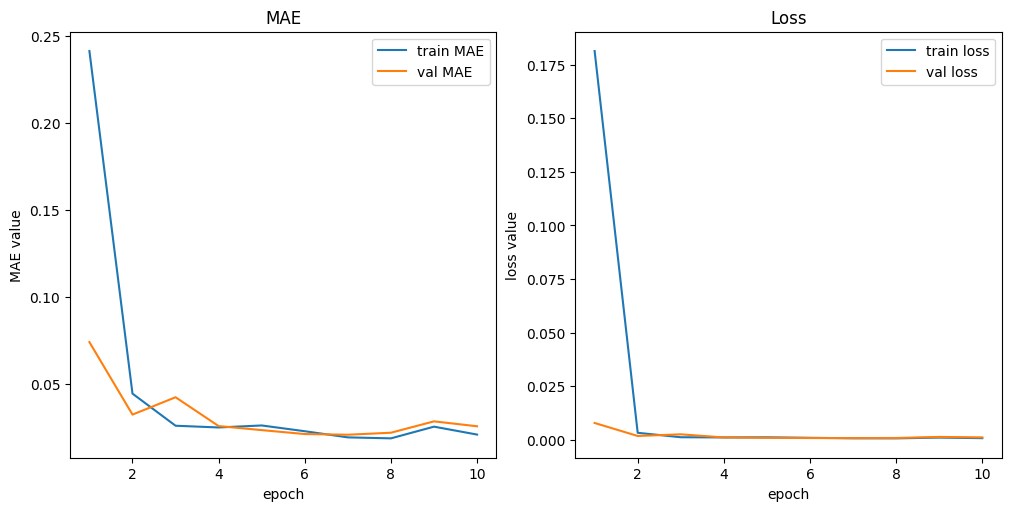

In [26]:
fig1, ax1 = plt.subplots(figsize=[10,5], nrows=1, ncols=2, layout='constrained')
x_axis = range(1, no_epoch+1)

# training accuracy
ax1[0].set_title("MAE")
ax1[0].plot(x_axis, history_rnn.history['mae'], label = "train MAE")
ax1[0].plot(x_axis, history_rnn.history['val_mae'], label = "val MAE")
ax1[0].set_xlabel('epoch')
ax1[0].set_ylabel('MAE value')
ax1[0].legend()

# training loss
ax1[1].set_title("Loss")
ax1[1].plot(x_axis,history_rnn.history['loss'], label = "train loss")
ax1[1].plot(x_axis,history_rnn.history['val_loss'], label = "val loss")
ax1[1].set_xlabel('epoch')
ax1[1].set_ylabel('loss value')
ax1[1].legend()

## 4.3. RNN Prediction

In [27]:
start = datetime.datetime.now()
y_pred_rnn = RNN.predict(X_test)
y_pred_rnn = restore_ground_val(y_pred_rnn, max_open)
y_true =  restore_ground_val(y_test, max_open)
print(y_pred_rnn.shape)
end = datetime.datetime.now()
RNN_test_time =  end-start
print("Total test time: ", RNN_test_time)

4/4 [==============================] - 0s 30ms/step
(113, 1)
Total test time:  0:00:00.477962


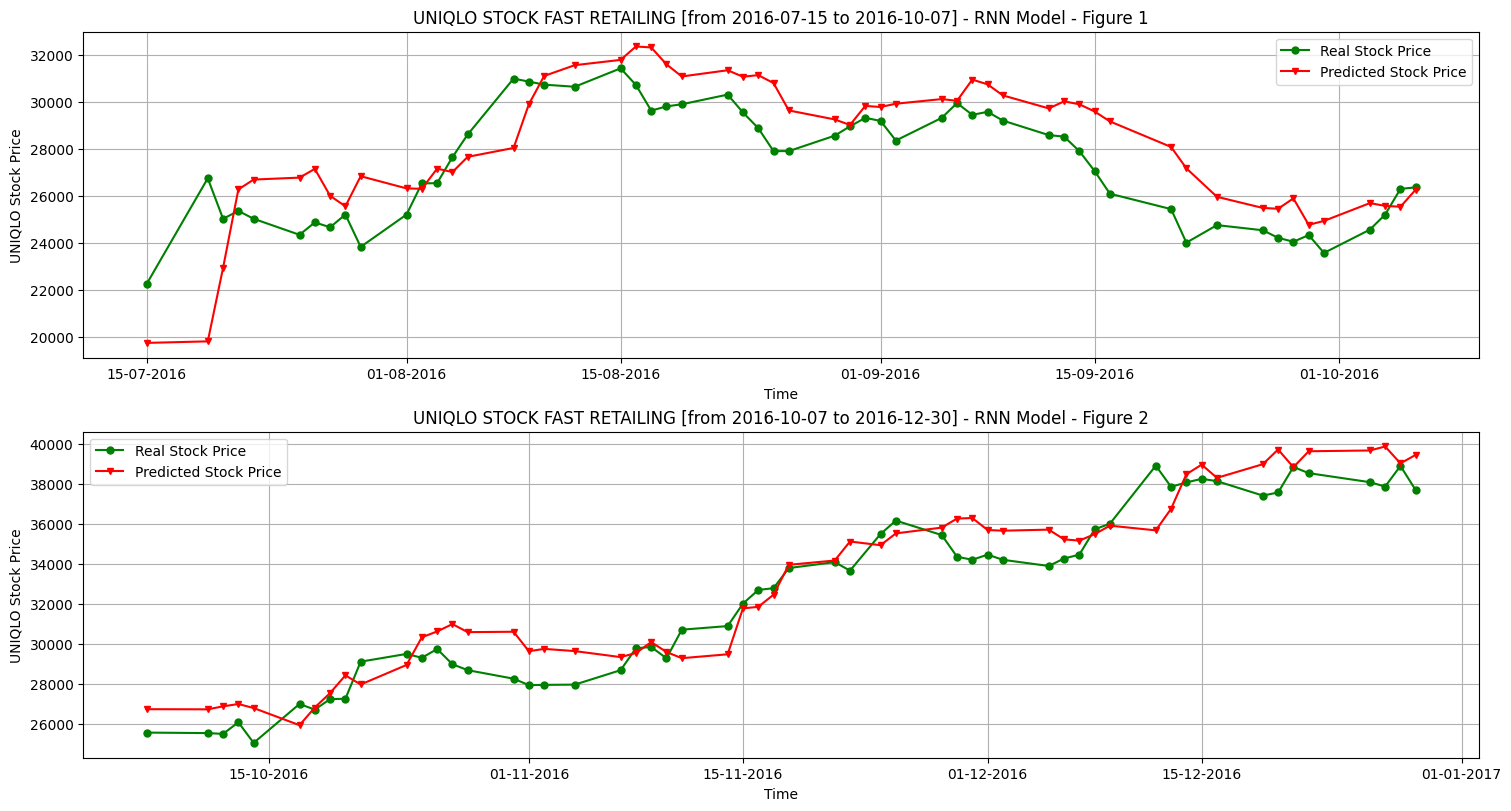

In [28]:
fig_num = 2
fig, ax = plt.subplots(figsize=[15,4*fig_num], nrows=fig_num, ncols=1, layout='constrained')
test_len = y_pred_rnn.shape[0]

for i in range(fig_num):
    start = (test_len // fig_num) * i
    end = (test_len // fig_num) * (i+1) if i != fig_num-1 else test_len -1
    ax[i].set_title(f'UNIQLO STOCK FAST RETAILING [from {test_date[start].date()} to {test_date[end].date()}] - RNN Model - Figure {i+1}')
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax[i].plot(test_date[start:end], y_true[start:end], color = 'green', marker='o', markersize=5, label = "Real Stock Price")
    ax[i].plot(test_date[start:end], y_pred_rnn[start:end], color = 'red', marker='v', markersize=5, label = "Predicted Stock Price")
    ax[i].legend()
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('UNIQLO Stock Price')
    ax[i].grid(True)
fig.savefig('RNN prediction')

# 5.FFNN

## 5.1 Modeling

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten

# Modeling
FFN = Sequential(layers=
    [
        Flatten(input_shape=(X_train.shape[1], 6)),  # Flatten the input
        Dense(units=no_unit, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(units=no_unit, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(units=no_unit, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(units=1)
    ]
)


In [30]:
FFN.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [31]:
# Summary of the FFNN model
FFN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 600)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               60100     
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                     

## 5.2 Training Progress

In [32]:
# Fitting train data
no_epoch = 100
batch_size = 32
validation_split = 0.2
start = datetime.datetime.now()
history_ffnn = FFN.fit(X_train, y_train, validation_split=validation_split,
                      epochs = no_epoch, batch_size = batch_size, verbose=1)
end = datetime.datetime.now()
FFNN_training_time =  end-start
print("Total execution time: ", FFNN_training_time)

Epoch 1/100
26/26 [==============================] - 4s 17ms/step - loss: 2.3504 - mae: 1.1992 - val_loss: 0.0769 - val_mae: 0.2528
Epoch 2/100
26/26 [==============================] - 0s 7ms/step - loss: 1.2183 - mae: 0.8532 - val_loss: 0.0453 - val_mae: 0.1850
Epoch 3/100
26/26 [==============================] - 0s 12ms/step - loss: 1.0405 - mae: 0.7906 - val_loss: 0.0812 - val_mae: 0.2512
Epoch 4/100
26/26 [==============================] - 0s 13ms/step - loss: 0.8130 - mae: 0.6997 - val_loss: 0.0644 - val_mae: 0.2304
Epoch 5/100
26/26 [==============================] - 0s 12ms/step - loss: 0.7507 - mae: 0.6696 - val_loss: 0.0472 - val_mae: 0.1990
Epoch 6/100
26/26 [==============================] - 0s 10ms/step - loss: 0.6376 - mae: 0.6161 - val_loss: 0.1114 - val_mae: 0.3147
Epoch 7/100
26/26 [==============================] - 0s 12ms/step - loss: 0.5848 - mae: 0.5595 - val_loss: 0.0236 - val_mae: 0.1261
Epoch 8/100
26/26 [==============================] - 0s 13ms/step - loss: 0.4

## 5.3 FFNN Prediction

In [33]:
start = datetime.datetime.now()
y_pred_ffnn = FFN.predict(X_test)
y_pred_ffnn = restore_ground_val(y_pred_ffnn, max_open)
y_true =  restore_ground_val(y_test, max_open)
print(y_pred_ffnn.shape)
end = datetime.datetime.now()
FFNN_test_time =  end-start
print("Total test time: ", FFNN_test_time)

4/4 [==============================] - 0s 3ms/step
(113, 1)
Total test time:  0:00:00.199745


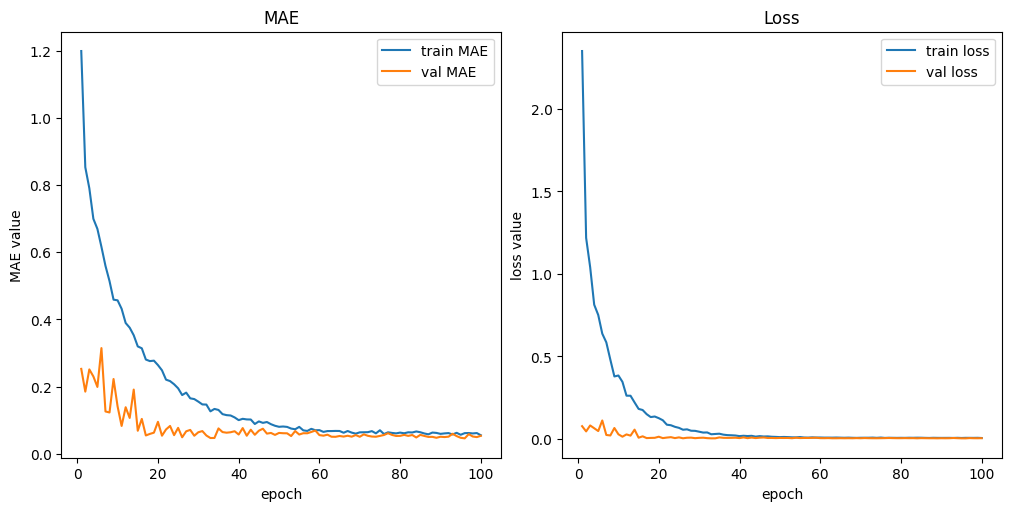

In [34]:
fig1, ax1 = plt.subplots(figsize=[10,5], nrows=1, ncols=2, layout='constrained')
x_axis = range(1, no_epoch+1)

# training accuracy
ax1[0].set_title("MAE")
ax1[0].plot(x_axis, history_ffnn.history['mae'], label = "train MAE")
ax1[0].plot(x_axis, history_ffnn.history['val_mae'], label = "val MAE")
ax1[0].set_xlabel('epoch')
ax1[0].set_ylabel('MAE value')
ax1[0].legend()

# training loss
ax1[1].set_title("Loss")
ax1[1].plot(x_axis,history_ffnn.history['loss'], label = "train loss")
ax1[1].plot(x_axis,history_ffnn.history['val_loss'], label = "val loss")
ax1[1].set_xlabel('epoch')
ax1[1].set_ylabel('loss value')
ax1[1].legend()

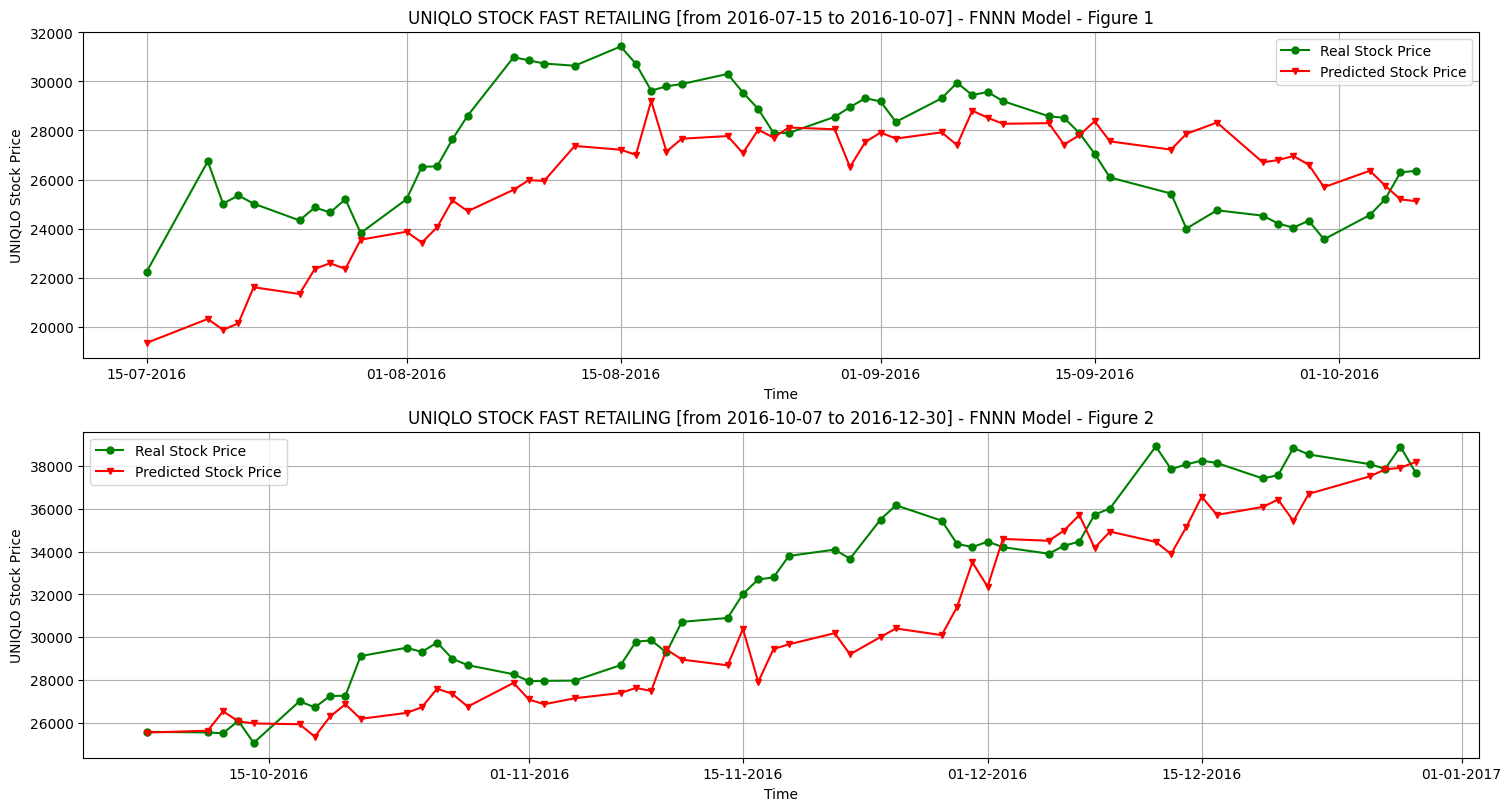

In [35]:
fig_num = 2
fig, ax = plt.subplots(figsize=[15,4*fig_num], nrows=fig_num, ncols=1, layout='constrained')
test_len = y_pred_ffnn.shape[0]

for i in range(fig_num):
    start = (test_len // fig_num) * i
    end = (test_len // fig_num) * (i+1) if i != fig_num-1 else test_len -1
    ax[i].set_title(f'UNIQLO STOCK FAST RETAILING [from {test_date[start].date()} to {test_date[end].date()}] - FNNN Model - Figure {i+1}')
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax[i].plot(test_date[start:end], y_true[start:end], color = 'green', marker='o', markersize=5, label = "Real Stock Price")
    ax[i].plot(test_date[start:end], y_pred_ffnn[start:end], color = 'red', marker='v', markersize=5, label = "Predicted Stock Price")
    ax[i].legend()
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('UNIQLO Stock Price')
    ax[i].grid(True)
fig.savefig('FFNN prediction')

# 6.MLP

## 6.1 Modeling

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten  # Import Flatten layer

In [37]:
start = datetime.datetime.now()
# Reshaping the input to fit the model
n_step = 100  # Assuming this is the number of time steps
n_features = 6  # Assuming this is the number of features

# Creating the model
MLP = Sequential([
    Flatten(input_shape=(n_step, n_features)),  # Flatten the input to fit Dense layers
    Dense(units=128, activation='relu'),
    BatchNormalization(),
    Dense(units=64, activation='relu'),
    BatchNormalization(),
    Dense(units=32, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.3),
    Dense(units=1)
])

# Compiling the model
MLP.compile(optimizer='adam', loss='mse', metrics=["mae"])

In [38]:
MLP.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 600)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               76928     
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 32)               

In [39]:
# Fitting train data
no_epoch = 100
batch_size = 32
validation_split = 0.2

history_mlp = MLP.fit(x=X_train,y=y_train,
    validation_split=validation_split,
    epochs = no_epoch,
    batch_size = batch_size,
    verbose = 1
)
end = datetime.datetime.now()
MLP_training_time =  end-start
print("Total execution time: ", MLP_training_time)

Epoch 1/100
26/26 [==============================] - 4s 23ms/step - loss: 1.9761 - mae: 1.0889 - val_loss: 0.2796 - val_mae: 0.4859
Epoch 2/100
26/26 [==============================] - 0s 12ms/step - loss: 1.1084 - mae: 0.8040 - val_loss: 0.4090 - val_mae: 0.5729
Epoch 3/100
26/26 [==============================] - 0s 10ms/step - loss: 0.9197 - mae: 0.7389 - val_loss: 0.3760 - val_mae: 0.5221
Epoch 4/100
26/26 [==============================] - 0s 10ms/step - loss: 0.7315 - mae: 0.6494 - val_loss: 0.0807 - val_mae: 0.2358
Epoch 5/100
26/26 [==============================] - 0s 7ms/step - loss: 0.6609 - mae: 0.6004 - val_loss: 0.3590 - val_mae: 0.4996
Epoch 6/100
26/26 [==============================] - 0s 7ms/step - loss: 0.6157 - mae: 0.5885 - val_loss: 0.0258 - val_mae: 0.1309
Epoch 7/100
26/26 [==============================] - 0s 7ms/step - loss: 0.5109 - mae: 0.5325 - val_loss: 0.2965 - val_mae: 0.4603
Epoch 8/100
26/26 [==============================] - 0s 8ms/step - loss: 0.5236

## 6.2 Training Progress

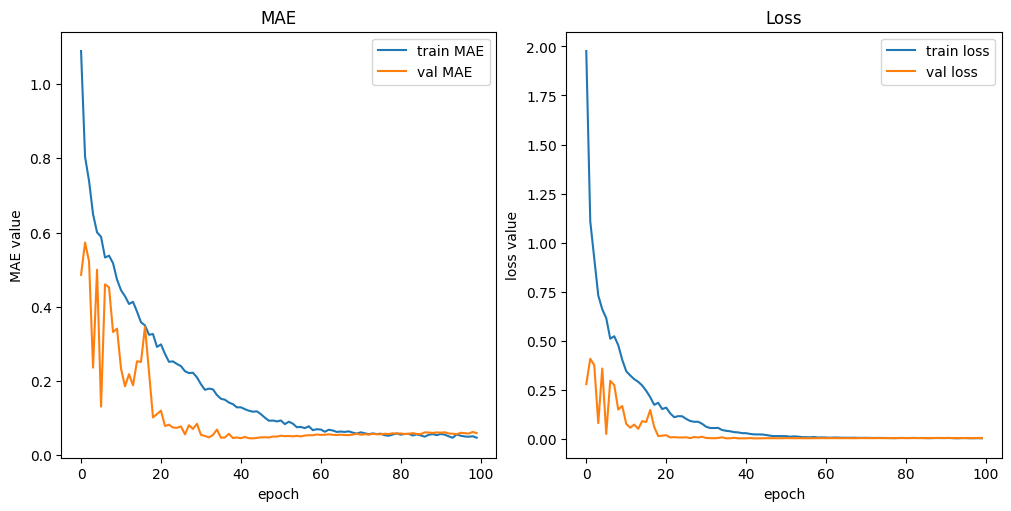

In [40]:
fig2, ax2 = plt.subplots(figsize=[10,5], nrows=1, ncols=2, layout='constrained')
# training accuracy
ax2[0].set_title("MAE")
ax2[0].plot(history_mlp.history['mae'], label = "train MAE")
ax2[0].plot(history_mlp.history['val_mae'], label = "val MAE")
ax2[0].set_xlabel('epoch')
ax2[0].set_ylabel('MAE value')
ax2[0].legend()

# training loss
ax2[1].set_title("Loss")
ax2[1].plot(history_mlp.history['loss'], label = "train loss")
ax2[1].plot(history_mlp.history['val_loss'], label = "val loss")
ax2[1].set_xlabel('epoch')
ax2[1].set_ylabel('loss value')
ax2[1].legend()

## 6.3 MLP Prediction

In [41]:
start = datetime.datetime.now()
y_pred_mlp = MLP.predict(X_test)
y_pred_mlp = restore_ground_val(y_pred_mlp, max_open)
y_true = restore_ground_val(y_test, max_open)
print(y_pred_mlp.shape)
end = datetime.datetime.now()
MLP_test_time =  end-start
print("Total test time: ", MLP_test_time)

4/4 [==============================] - 0s 4ms/step
(113, 1)
Total test time:  0:00:00.198556


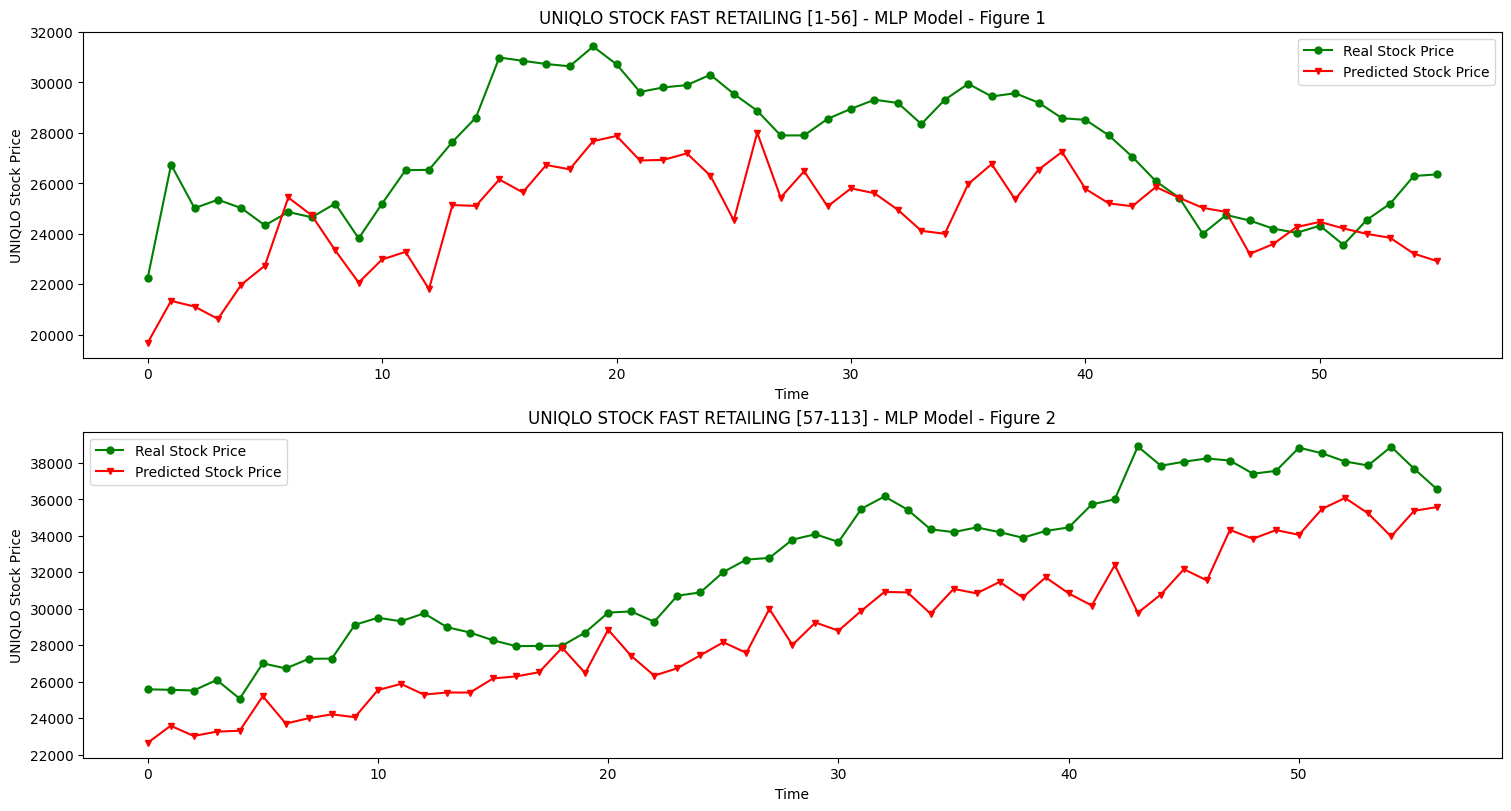

In [42]:
fig_num = 2
fig, ax = plt.subplots(figsize=[15,4*fig_num], nrows=fig_num, ncols=1, layout='constrained')
test_len = y_pred_mlp.shape[0]

for i in range(fig_num):
    start = (test_len // fig_num) * i
    end = (test_len // fig_num) * (i+1) if i != fig_num-1 else test_len
    ax[i].set_title(f'UNIQLO STOCK FAST RETAILING [{start+1}-{end}] - MLP Model - Figure {i+1}')
    ax[i].plot(y_true[start:end], color = 'green', marker='o', markersize=5, label = "Real Stock Price")
    ax[i].plot(y_pred_mlp[start:end], color = 'red', marker='v', markersize=5, label = "Predicted Stock Price")
    ax[i].legend()
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('UNIQLO Stock Price')
fig.savefig('MLP prediction')


# 7.LSTM

In [43]:
from keras.layers import LSTM, Bidirectional

### 7.1 Modeling

In [44]:
# Modeling
no_unit = 50
LSTM = Sequential(layers=
    [
        Bidirectional(layer =
            LSTM(units=no_unit, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 6))
        ),
        Bidirectional(layer =
            LSTM(units=no_unit, activation='relu', return_sequences=True)
        ),
        Bidirectional(layer =
            LSTM(units=no_unit, activation='relu', return_sequences=False)
        ),
        Dense(units = 1)
    ]
)

In [45]:
# Build the model by calling it on a sample batch of data
LSTM.build(input_shape=(batch_size, X_train.shape[1], 6))

In [46]:
# Compiling
LSTM.compile(optimizer='adam', loss = 'mse', metrics=["mae"])
# LSTM.summary()

In [47]:
LSTM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (32, 100, 100)            22800     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (32, 100, 100)            60400     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (32, 100)                 60400     
 onal)                                                           
                                                                 
 dense_9 (Dense)             (32, 1)                   101       
                                                                 
Total params: 143701 (561.33 KB)
Trainable params: 143701 (561.33 KB)
Non-trainable params: 0 (0.00 Byte)
______________

### 7.2 Training Progress

In [48]:
no_epoch = 10
batch_size = 32
validation_split = 0.2

history_lstm = LSTM.fit(X_train, y_train, validation_split=validation_split,
                        epochs = no_epoch, batch_size = batch_size)

Epoch 1/10
26/26 [==============================] - 32s 887ms/step - loss: 0.0603 - mae: 0.1775 - val_loss: 0.0063 - val_mae: 0.0641
Epoch 2/10
26/26 [==============================] - 27s 985ms/step - loss: 0.0104 - mae: 0.0830 - val_loss: 0.0153 - val_mae: 0.1099
Epoch 3/10
26/26 [==============================] - 21s 786ms/step - loss: 0.0039 - mae: 0.0502 - val_loss: 0.0207 - val_mae: 0.1324
Epoch 4/10
26/26 [==============================] - 20s 772ms/step - loss: 0.0029 - mae: 0.0419 - val_loss: 0.0093 - val_mae: 0.0825
Epoch 5/10
26/26 [==============================] - 20s 753ms/step - loss: 0.0023 - mae: 0.0368 - val_loss: 0.0113 - val_mae: 0.0928
Epoch 6/10
26/26 [==============================] - 22s 834ms/step - loss: 0.0020 - mae: 0.0343 - val_loss: 0.0068 - val_mae: 0.0702
Epoch 7/10
26/26 [==============================] - 20s 756ms/step - loss: 0.0018 - mae: 0.0318 - val_loss: 0.0075 - val_mae: 0.0736
Epoch 8/10
26/26 [==============================] - 21s 808ms/step - 

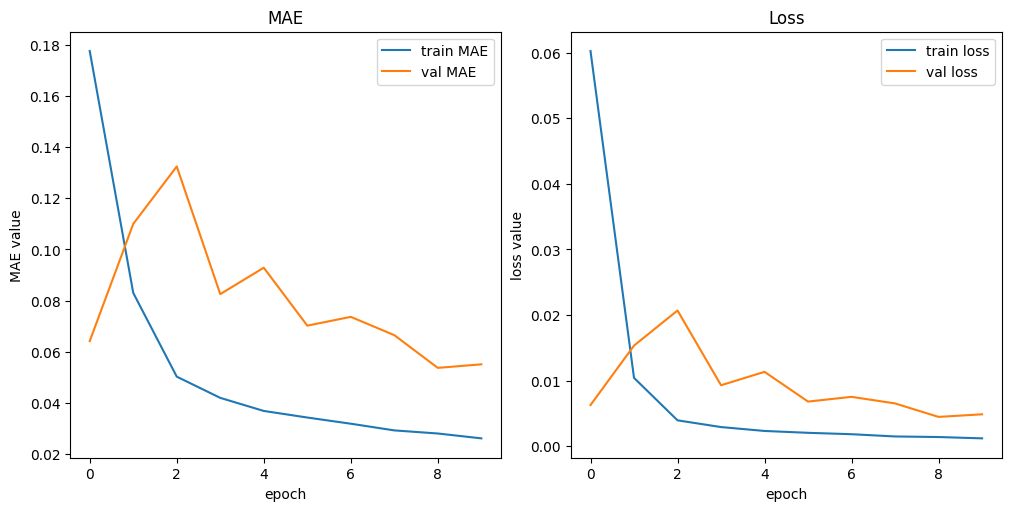

In [49]:
fig3, ax3 = plt.subplots(figsize=[10,5], nrows=1, ncols=2, layout='constrained')
# training accuracy
ax3[0].set_title("MAE")
ax3[0].plot(history_lstm.history['mae'], label = "train MAE")
ax3[0].plot(history_lstm.history['val_mae'], label = "val MAE")
ax3[0].set_xlabel('epoch')
ax3[0].set_ylabel('MAE value')
ax3[0].legend()

# training loss
ax3[1].set_title("Loss")
ax3[1].plot(history_lstm.history['loss'], label = "train loss")
ax3[1].plot(history_lstm.history['val_loss'], label = "val loss")
ax3[1].set_xlabel('epoch')
ax3[1].set_ylabel('loss value')
ax3[1].legend()

## 7.3 LSTM Prediction

In [50]:
y_pred_lstm = LSTM.predict(X_test)
y_pred_lstm = restore_ground_val(y_pred_lstm, max_open)
y_true =  restore_ground_val(y_test, max_open)
print(y_pred_lstm.shape)

4/4 [==============================] - 1s 91ms/step
(113, 1)


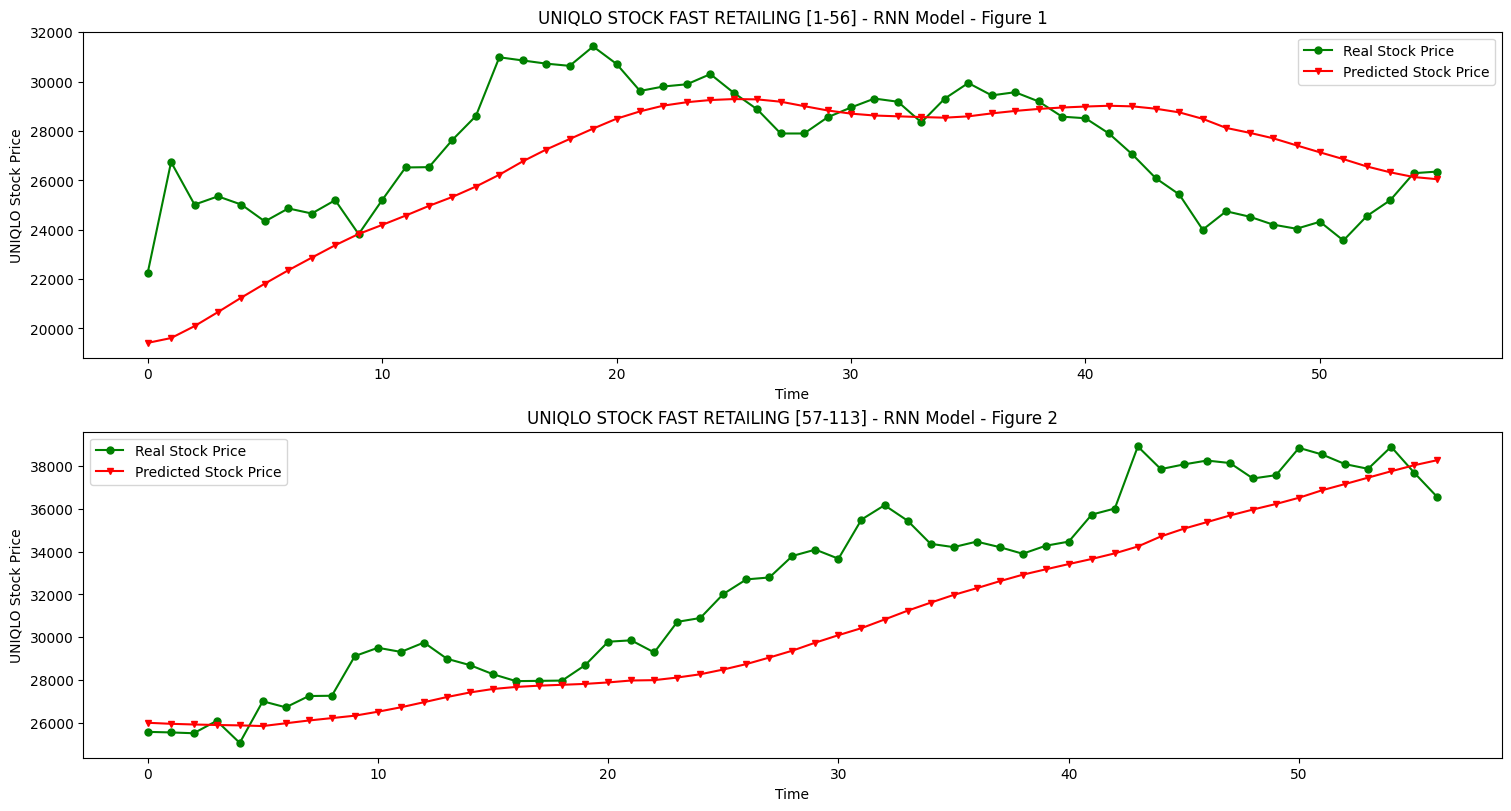

In [51]:
fig_num = 2
fig, ax = plt.subplots(figsize=[15,4*fig_num], nrows=fig_num, ncols=1, layout='constrained')
test_len = y_pred_lstm.shape[0]

for i in range(fig_num):
    start = (test_len // fig_num) * i
    end = (test_len // fig_num) * (i+1) if i != fig_num-1 else test_len
    ax[i].set_title(f'UNIQLO STOCK FAST RETAILING [{start+1}-{end}] - RNN Model - Figure {i+1}')
    ax[i].plot(y_true[start:end], color = 'green', marker='o', markersize=5, label = "Real Stock Price")
    ax[i].plot(y_pred_lstm[start:end], color = 'red', marker='v', markersize=5, label = "Predicted Stock Price")
    ax[i].legend()
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('UNIQLO Stock Price')
fig.savefig('LSTM prediction')

# 8.K-Nearest Regressor

In [122]:
new_df = pd.DataFrame(data_scaled)
df = pd.DataFrame(dataset)

In [123]:
df.drop(df.columns[0], axis=1, inplace=True)
df

,Open,High,Low,Close,Volume,Stock Trading
0,14050,14050,13700,13720,559100,7.719804e+09
1,13720,13840,13600,13800,511500,7.030811e+09
2,13990,14030,13790,13850,765500,1.063561e+10
3,13890,14390,13860,14390,952300,1.353341e+10
4,14360,14750,14280,14590,1043400,1.519199e+10
...,...,...,...,...,...,...
1221,43310,43660,43090,43340,358200,1.554780e+10
1222,43140,43700,43140,43620,400100,1.742799e+10
1223,43940,43970,43270,43270,339900,1.478067e+10
1224,43000,43220,42540,42660,448400,1.918823e+10


In [124]:
new_df.shape

(1226, 6)

In [125]:
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,5]
print(X.shape)
print(y.shape)

(1226, 5)
(1226,)


### Use peasron for extract important feature

In [126]:
from scipy.stats import pearsonr

In [127]:
pearson = {}
for i, ft in enumerate(df.columns[:-1]):
  pearson[ft] = pearsonr(X.iloc[:,i],y).correlation

<BarContainer object of 5 artists>

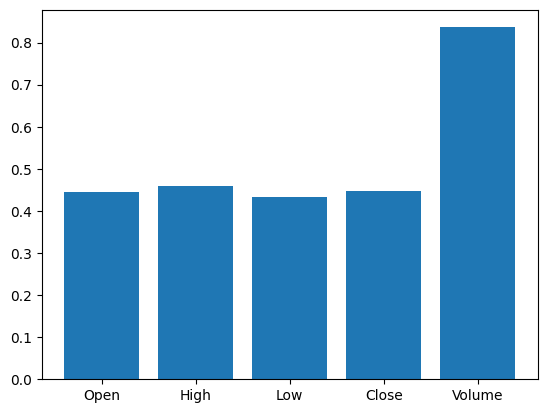

In [128]:
plt.bar(pearson.keys(), pearson.values())

In [129]:
df.head()

,Open,High,Low,Close,Volume,Stock Trading
0,14050,14050,13700,13720,559100,7.719804e+09
1,13720,13840,13600,13800,511500,7.030811e+09
2,13990,14030,13790,13850,765500,1.063561e+10
3,13890,14390,13860,14390,952300,1.353341e+10
4,14360,14750,14280,14590,1043400,1.519199e+10


In [130]:
df_select = new_df.drop([0,1,2,3],axis=1)

In [131]:
df_select

,4,5
0,0.087533,0.026420
1,0.077612,0.021570
2,0.130549,0.046942
3,0.169480,0.067338
4,0.188467,0.079011
...,...,...
1221,0.045663,0.081516
1222,0.054395,0.094749
1223,0.041849,0.076116
1224,0.064462,0.107138


In [132]:
df_select.shape

(1226, 2)

In [133]:
X = df_select.iloc[:,:-1]
y = df_select.iloc[:,1]
print(X.shape)
print(y.shape)

(1226, 1)
(1226,)


In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

## 8.1 Modeling

In [148]:
from sklearn.neighbors import KNeighborsRegressor

In [149]:
KNR = KNeighborsRegressor(n_neighbors=2, weights='distance')
KNR.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2, weights='distance')

## 8.2 KNR Prediction

In [150]:
y_pred_knr = KNR.predict(X_test)

In [151]:
score = KNR.score(X_test, y_test)
print(score)

0.612556516829881


In [152]:
y_pred_knr = restore_ground_val(y_pred_knr, max_open)
y_true = restore_ground_val(y_test, max_open)
y_pred_knr.shape

(307,)

In [153]:
from sklearn.metrics import mean_squared_error

# Assuming y_pred_knr and y_true are the predicted and true values
mse_knr = mean_squared_error(y_test, y_pred_knr)
print("MSE for KNR predictions:", mse_knr)


MSE for KNR predictions: 116445928.13588494


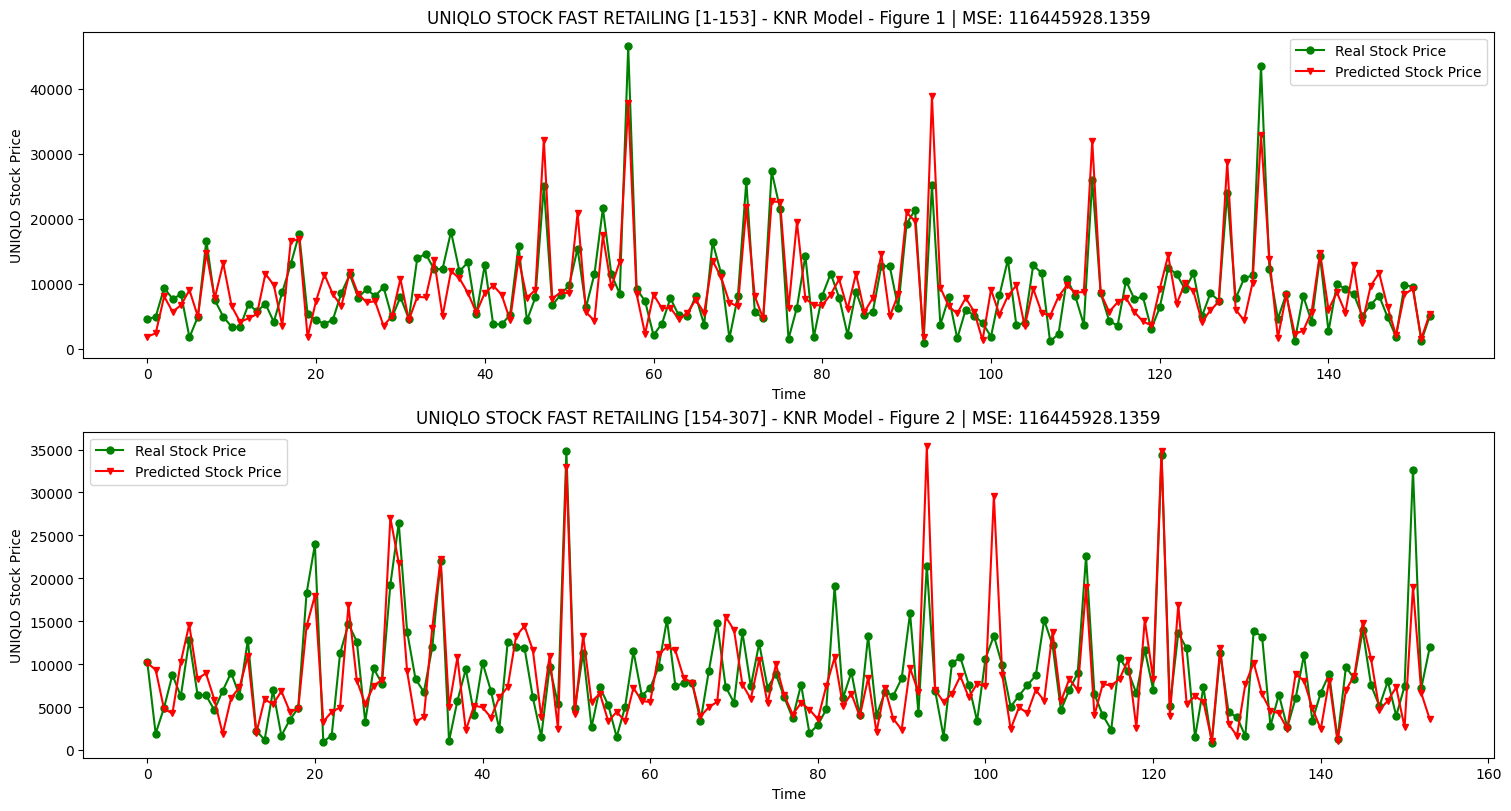

In [154]:
fig_num = 2
fig, ax = plt.subplots(figsize=[15, 4 * fig_num], nrows=fig_num, ncols=1, constrained_layout=True)
test_len = y_pred_knr.shape[0]

for i in range(fig_num):
    start = (test_len // fig_num) * i
    end = (test_len // fig_num) * (i + 1) if i != fig_num - 1 else test_len
    ax[i].set_title(f'UNIQLO STOCK FAST RETAILING [{start + 1}-{end}] - KNR Model - Figure {i + 1} | MSE: {mse_knr:.4f}')
    ax[i].plot(y_true[start:end], color='green', marker='o', markersize=5, label="Real Stock Price")
    ax[i].plot(y_pred_knr[start:end], color='red', marker='v', markersize=5, label="Predicted Stock Price")
    ax[i].legend()
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('UNIQLO Stock Price')

fig.savefig('KNR_prediction.png')
plt.show()

# Compare MSE, MAE of 3 models

In [63]:
train_times = [x.total_seconds() for x in  [RNN_training_time,
                                            FFNN_training_time,
                                            MLP_training_time]]
test_times = [x.total_seconds() for x in [RNN_training_time,
                                            FFNN_training_time,
                                            MLP_training_time]]
model_names = [ "RNN", "FFNN","MLP"]
comparation = pd.DataFrame([train_times, test_times], index=["train", "test"], columns = model_names)

In [64]:
comparation

,RNN,FFNN,MLP
train,76.745214,26.980898,42.547786
test,76.745214,26.980898,42.547786


Text(0, 0.5, 'time in second')

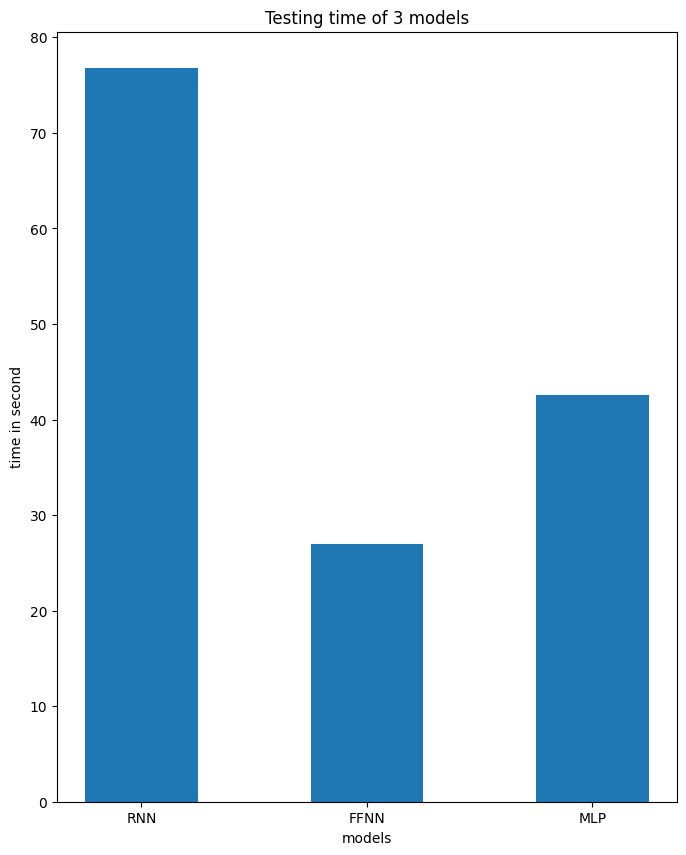

In [65]:
plt.figure(figsize=[8, 10])
plt.bar(x=model_names, height=test_times, width = 0.5)
plt.title("Testing time of 3 models")
plt.xlabel("models")
plt.ylabel("time in second")